## RECOMMENDATION ENGINE

### Introduction
This is a simple content-based recommendation engine for movies. It uses the cosine similarity between various movie features to recommend similar movies. The project also showcases the use of streamlit for creating a simple web app for the recommendation engine.

In [7]:
# import the required libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

The datasets used in this project are available in the following link: https://www.kaggle.com/datasets/rounakbanik/the-movies-dataset/data

In [8]:
# load the keywords dataset
keywords = pd.read_csv('keywords.csv')


# load the movies_metadata dataset
movies_metadata = pd.read_csv('movies_metadata.csv') 


### Data Examination

In [9]:
keywords.head()

,id,keywords
0,862,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,8844,"[{'id': 10090, 'name': 'board game'}, {'id': 1..."
2,15602,"[{'id': 1495, 'name': 'fishing'}, {'id': 12392..."
3,31357,"[{'id': 818, 'name': 'based on novel'}, {'id':..."
4,11862,"[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n..."


In [10]:
movies_metadata.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [11]:
# print rows where id is 862
movies_metadata[movies_metadata['id'] == '862']

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0


In [12]:
# print rows where id is 862
keywords[keywords['id'] == 862]

,id,keywords
0,862,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."


### Data Cleaning

In [13]:
# check the shape of the datasets
movies_metadata.shape, keywords.shape, keywords.shape[0] - movies_metadata.shape[0]

((45466, 24), (46419, 2), 953)

In [14]:
#convert the id column to int
movies_metadata['id'] = pd.to_numeric(movies_metadata['id'], errors='coerce')

In [15]:
# the count of each unique value in the id column in the movies_metadata dataset
movies_metadata['id'].value_counts()

id
141971.0    3
5511.0      2
132641.0    2
10991.0     2
168538.0    2
           ..
55135.0     1
15877.0     1
72272.0     1
1549.0      1
461257.0    1
Name: count, Length: 45433, dtype: int64

In [16]:
# print rows where id is 141971.0    
movies_metadata[movies_metadata['id'] == 141971.0]

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
13261,False,NaN,0,"[{'id': 53, 'name': 'Thriller'}, {'id': 9648, ...",NaN,141971.0,tt1180333,fi,Blackout,Recovering from a nail gun shot to the head an...,...,2008-12-26,0.0,108.0,"[{'iso_639_1': 'fi', 'name': 'suomi'}]",Released,Which one is the first to return - memory or t...,Blackout,False,6.7,3.0
13375,False,NaN,0,"[{'id': 53, 'name': 'Thriller'}, {'id': 9648, ...",NaN,141971.0,tt1180333,fi,Blackout,Recovering from a nail gun shot to the head an...,...,2008-12-26,0.0,108.0,"[{'iso_639_1': 'fi', 'name': 'suomi'}]",Released,Which one is the first to return - memory or t...,Blackout,False,6.7,3.0
16764,False,NaN,0,"[{'id': 53, 'name': 'Thriller'}, {'id': 9648, ...",NaN,141971.0,tt1180333,fi,Blackout,Recovering from a nail gun shot to the head an...,...,2008-12-26,0.0,108.0,"[{'iso_639_1': 'fi', 'name': 'suomi'}]",Released,Which one is the first to return - memory or t...,Blackout,False,6.7,3.0


In [17]:
# drop all duplicates in the movies_metadata dataset
movies_metadata.drop_duplicates(subset='id', inplace=True)
movies_metadata.shape

(45434, 24)

In [18]:
# the count of each unique value in the id column in the keywords dataset
keywords['id'].value_counts()

id
141971    3
159849    3
105045    2
255396    2
85729     2
         ..
55135     1
15877     1
72272     1
1549      1
461257    1
Name: count, Length: 45432, dtype: int64

In [19]:
# print rows where id is 141971.0    
keywords[keywords['id'] == 141971.0]

,id,keywords
13261,141971,[]
13375,141971,[]
16764,141971,[]


In [20]:
# check for duplicates in the keywords dataset
keywords.duplicated().sum()

987

In [21]:
# drop all duplicates in the keywords dataset
keywords.drop_duplicates(subset='id', inplace=True)
keywords.shape

(45432, 2)

In [22]:
# check the missing values in the movies_metadata dataset
movies_metadata.isnull().sum()

adult                        0
belongs_to_collection    40945
budget                       0
genres                       0
homepage                 37659
id                           1
imdb_id                     17
original_language           11
original_title               0
overview                   954
popularity                   4
poster_path                386
production_companies         3
production_countries         3
release_date                87
revenue                      4
runtime                    261
spoken_languages             4
status                      85
tagline                  25033
title                        4
video                        4
vote_average                 4
vote_count                   4
dtype: int64

#### Merging the movies_metadata and keywords dataframes

In [23]:
# left join the movies_metadata and keywords dataframes on the id column
movies = pd.merge(movies_metadata, keywords, on='id', how='inner')
print(movies.shape)
movies.isnull().sum()


(45432, 25)


adult                        0
belongs_to_collection    40944
budget                       0
genres                       0
homepage                 37658
id                           0
imdb_id                     17
original_language           11
original_title               0
overview                   954
popularity                   3
poster_path                386
production_companies         3
production_countries         3
release_date                87
revenue                      3
runtime                    260
spoken_languages             3
status                      84
tagline                  25031
title                        3
video                        3
vote_average                 3
vote_count                   3
keywords                     0
dtype: int64

In [24]:
# view the first 5 rows of the movies dataset
movies.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,keywords
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862.0,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844.0,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,"[{'id': 10090, 'name': 'board game'}, {'id': 1..."
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602.0,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0,"[{'id': 1495, 'name': 'fishing'}, {'id': 12392..."
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357.0,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0,"[{'id': 818, 'name': 'based on novel'}, {'id':..."
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862.0,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0,"[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n..."


In [25]:
# drop all unwanted columns in the movies dataset

unwanted_columns = [ 'belongs_to_collection', 'budget', 'homepage', 'video', 'vote_count', 'original_language', 'original_title',  'production_countries', 'revenue', 'runtime', 'spoken_languages', 'status' ]

movies.drop(unwanted_columns, axis=1, inplace=True)
print(movies.shape)
movies.head()

(45432, 13)


,adult,genres,id,imdb_id,overview,popularity,poster_path,production_companies,release_date,tagline,title,vote_average,keywords
0,False,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862.0,tt0114709,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]",1995-10-30,NaN,Toy Story,7.7,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,False,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844.0,tt0113497,When siblings Judy and Peter discover an encha...,17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...",1995-12-15,Roll the dice and unleash the excitement!,Jumanji,6.9,"[{'id': 10090, 'name': 'board game'}, {'id': 1..."
2,False,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",15602.0,tt0113228,A family wedding reignites the ancient feud be...,11.7129,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...",1995-12-22,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,6.5,"[{'id': 1495, 'name': 'fishing'}, {'id': 12392..."
3,False,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",31357.0,tt0114885,"Cheated on, mistreated and stepped on, the wom...",3.859495,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,[{'name': 'Twentieth Century Fox Film Corporat...,1995-12-22,Friends are the people who let you be yourself...,Waiting to Exhale,6.1,"[{'id': 818, 'name': 'based on novel'}, {'id':..."
4,False,"[{'id': 35, 'name': 'Comedy'}]",11862.0,tt0113041,Just when George Banks has recovered from his ...,8.387519,/e64sOI48hQXyru7naBFyssKFxVd.jpg,"[{'name': 'Sandollar Productions', 'id': 5842}...",1995-02-10,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,5.7,"[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n..."


In [26]:
df = movies.copy()

In [27]:
df.head(2)

,adult,genres,id,imdb_id,overview,popularity,poster_path,production_companies,release_date,tagline,title,vote_average,keywords
0,False,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862.0,tt0114709,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]",1995-10-30,NaN,Toy Story,7.7,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,False,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844.0,tt0113497,When siblings Judy and Peter discover an encha...,17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...",1995-12-15,Roll the dice and unleash the excitement!,Jumanji,6.9,"[{'id': 10090, 'name': 'board game'}, {'id': 1..."


In [28]:
df.shape

(45432, 13)

In [29]:
df.isnull().sum()   

adult                       0
genres                      0
id                          0
imdb_id                    17
overview                  954
popularity                  3
poster_path               386
production_companies        3
release_date               87
tagline                 25031
title                       3
vote_average                3
keywords                    0
dtype: int64

Dealing with null values

In [30]:
# Drop rows with missing imdb_id
df = df.dropna(subset=['imdb_id'])

# replace nulls in overview column with 'None'
df['overview'] = df['overview'].fillna('None')

# drop rows with missing popularity
df = df.dropna(subset=['popularity'])

# replace nulls in tagline column with 'None'
df['tagline'] = df['tagline'].fillna('None')

# drop rows with missing title
df = df.dropna(subset=['title'])

# drop rows with missing vote_average
df = df.dropna(subset=['vote_average'])


# drop rows with missing poster_path
df = df.dropna(subset=['poster_path'])

# drop rows with missing release_date            
df = df.dropna(subset=['release_date'])

In [31]:
# recheck for missing values
df.isnull().sum()

adult                   0
genres                  0
id                      0
imdb_id                 0
overview                0
popularity              0
poster_path             0
production_companies    0
release_date            0
tagline                 0
title                   0
vote_average            0
keywords                0
dtype: int64

In [32]:
df.head(1)

,adult,genres,id,imdb_id,overview,popularity,poster_path,production_companies,release_date,tagline,title,vote_average,keywords
0,False,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862.0,tt0114709,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]",1995-10-30,None,Toy Story,7.7,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."


In [33]:
df['keywords'].iloc[0]

"[{'id': 931, 'name': 'jealousy'}, {'id': 4290, 'name': 'toy'}, {'id': 5202, 'name': 'boy'}, {'id': 6054, 'name': 'friendship'}, {'id': 9713, 'name': 'friends'}, {'id': 9823, 'name': 'rivalry'}, {'id': 165503, 'name': 'boy next door'}, {'id': 170722, 'name': 'new toy'}, {'id': 187065, 'name': 'toy comes to life'}]"

In [34]:
# convert he release_date column to datetime
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')

df.dtypes



adult                           object
genres                          object
id                             float64
imdb_id                         object
overview                        object
popularity                      object
poster_path                     object
production_companies            object
release_date            datetime64[ns]
tagline                         object
title                           object
vote_average                   float64
keywords                        object
dtype: object

Now, we will filter the movies dataset to only include movies with a movies release after 2015

In [35]:
# count of movies released after 2015
df[df['release_date'] > '2015-01-01'].shape

(3999, 13)

In [36]:
# filter out movies released after 2015
df = df[df['release_date'] > '2015-01-01']

Extracting strings from the columns with json data

In [37]:
import ast

# list of columns with json data
json_columns = ['genres', 'keywords', 'production_companies']


# Function to extract genres as a list
def extract_string(column_str):
    try:
        # Safely evaluate the string to a Python object
        column_list = ast.literal_eval(column_str)
        # Extract the 'name' field from each dictionary for individual columns
        #return [column_str['name'] for column in column_list]
        return [column['name'] for column in column_list if isinstance(column, dict) and 'name' in column]
    except (ValueError, SyntaxError):
        # Handle invalid genre strings
        return []

# Apply the function to the json columns
for column in json_columns:
    df[column] = df[column].apply(extract_string)


In [38]:
df.head(3)

,adult,genres,id,imdb_id,overview,popularity,poster_path,production_companies,release_date,tagline,title,vote_average,keywords
22310,False,[Comedy],194188.0,tt2836166,"Punk's Dead, the sequel to 1999 cult hit SLC P...",0.700489,/1IzcjXhZHewvmLfKd8eGucDutyQ.jpg,[],2016-02-11,A young punk's odyssey.,Punk's Dead: SLC Punk 2,6.0,[]
23456,False,"[Action, Adventure, Thriller]",177677.0,tt2381249,Ethan and team take on their most impossible m...,17.836882,/z2sJd1OvAGZLxgjBdSnQoLCfn3M.jpg,"[Paramount Pictures, Skydance Productions, Chi...",2015-07-23,Desperate Times. Desperate Measures.,Mission: Impossible - Rogue Nation,7.1,"[london england, spy, austria, villain, sequel..."
23617,False,[],295958.0,tt2990756,This soulful documentary illuminates the hell-...,0.043929,/cFaNxdOzL47wb1M1hvIf0Vtd99u.jpg,[],2016-07-15,None,Sound of Redemption: The Frank Morgan Story,0.0,[woman director]


Perfect! We have successfully extracted the genres, keywords, and production companies from the json columns. Let's now move on to the next step of the project.

### Data transformation

Re-engineering the popularity and vote_count columns

In [39]:
# scale the popularity column to a range of 0 to 10
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 10))
df['popularity'] = scaler.fit_transform(df[['popularity']])

# round off the popularity column to 2 decimal places
df['popularity'] = df['popularity'].round(2)
df.head(2)

,adult,genres,id,imdb_id,overview,popularity,poster_path,production_companies,release_date,tagline,title,vote_average,keywords
22310,False,[Comedy],194188.0,tt2836166,"Punk's Dead, the sequel to 1999 cult hit SLC P...",0.01,/1IzcjXhZHewvmLfKd8eGucDutyQ.jpg,[],2016-02-11,A young punk's odyssey.,Punk's Dead: SLC Punk 2,6.0,[]
23456,False,"[Action, Adventure, Thriller]",177677.0,tt2381249,Ethan and team take on their most impossible m...,0.33,/z2sJd1OvAGZLxgjBdSnQoLCfn3M.jpg,"[Paramount Pictures, Skydance Productions, Chi...",2015-07-23,Desperate Times. Desperate Measures.,Mission: Impossible - Rogue Nation,7.1,"[london england, spy, austria, villain, sequel..."


Let us check the distribution of the popularity column

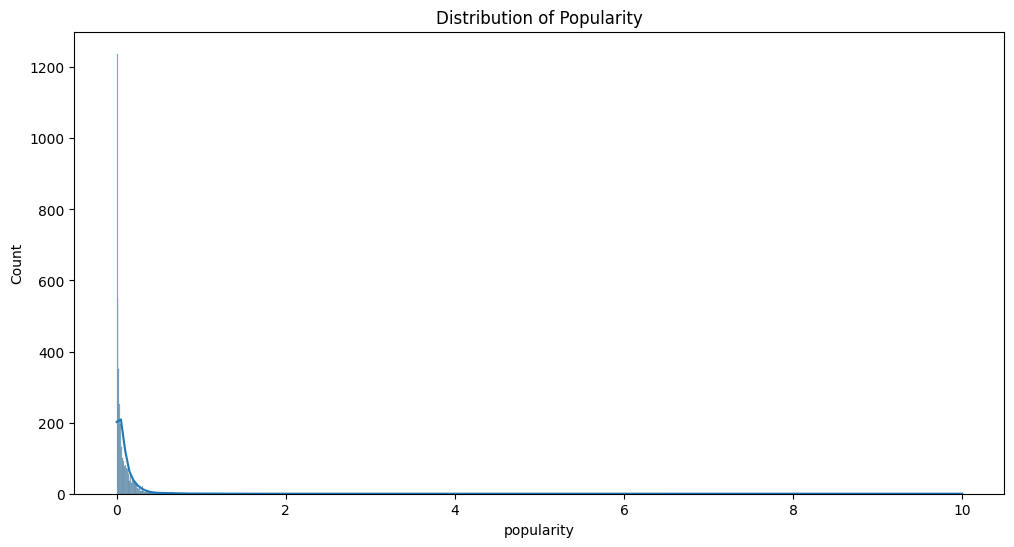

In [40]:
# plot the distribution of the popularity column
plt.figure(figsize=(12, 6))
sns.histplot(df['popularity'], kde=True)
plt.title('Distribution of Popularity')
plt.show()

Now, we will remove the outliers in the popularity column using the z-score method.



In [41]:
# Compute the Z-score
mean_popularity = df['popularity'].mean()
std_popularity = df['popularity'].std()
df['z_score'] = (df['popularity'] - mean_popularity) / std_popularity

In [42]:
df.head(2)

,adult,genres,id,imdb_id,overview,popularity,poster_path,production_companies,release_date,tagline,title,vote_average,keywords,z_score
22310,False,[Comedy],194188.0,tt2836166,"Punk's Dead, the sequel to 1999 cult hit SLC P...",0.01,/1IzcjXhZHewvmLfKd8eGucDutyQ.jpg,[],2016-02-11,A young punk's odyssey.,Punk's Dead: SLC Punk 2,6.0,[],-0.287411
23456,False,"[Action, Adventure, Thriller]",177677.0,tt2381249,Ethan and team take on their most impossible m...,0.33,/z2sJd1OvAGZLxgjBdSnQoLCfn3M.jpg,"[Paramount Pictures, Skydance Productions, Chi...",2015-07-23,Desperate Times. Desperate Measures.,Mission: Impossible - Rogue Nation,7.1,"[london england, spy, austria, villain, sequel...",0.937465


In [43]:
# Set the threshold 
threshold = 2
df_no_outliers = df[abs(df['z_score']) <= threshold]  

# Drop the z_score column 
df_no_outliers = df_no_outliers.drop(columns=['z_score'])

# Display the cleaned dataframe
df = df_no_outliers
print(df.shape)
df.head(3)

(3945, 13)


,adult,genres,id,imdb_id,overview,popularity,poster_path,production_companies,release_date,tagline,title,vote_average,keywords
22310,False,[Comedy],194188.0,tt2836166,"Punk's Dead, the sequel to 1999 cult hit SLC P...",0.01,/1IzcjXhZHewvmLfKd8eGucDutyQ.jpg,[],2016-02-11,A young punk's odyssey.,Punk's Dead: SLC Punk 2,6.0,[]
23456,False,"[Action, Adventure, Thriller]",177677.0,tt2381249,Ethan and team take on their most impossible m...,0.33,/z2sJd1OvAGZLxgjBdSnQoLCfn3M.jpg,"[Paramount Pictures, Skydance Productions, Chi...",2015-07-23,Desperate Times. Desperate Measures.,Mission: Impossible - Rogue Nation,7.1,"[london england, spy, austria, villain, sequel..."
23617,False,[],295958.0,tt2990756,This soulful documentary illuminates the hell-...,0.00,/cFaNxdOzL47wb1M1hvIf0Vtd99u.jpg,[],2016-07-15,None,Sound of Redemption: The Frank Morgan Story,0.0,[woman director]


Let us re-check the distribution of the popularity column after removing the outliers.

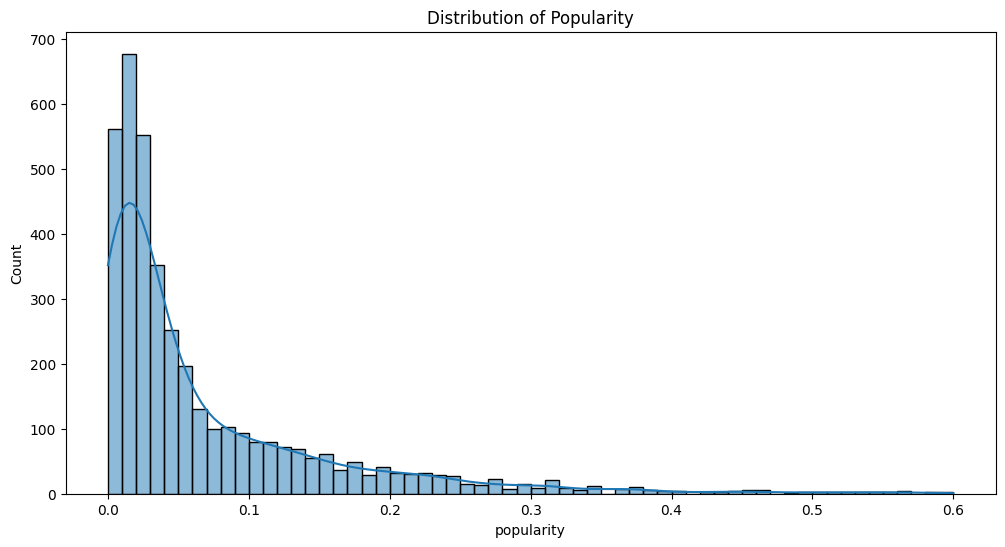

In [44]:
# plot the distribution of the popularity column
plt.figure(figsize=(12, 6))
sns.histplot(df['popularity'], kde=True)
plt.title('Distribution of Popularity')
plt.show()

Next we will exmaine the vote_average column

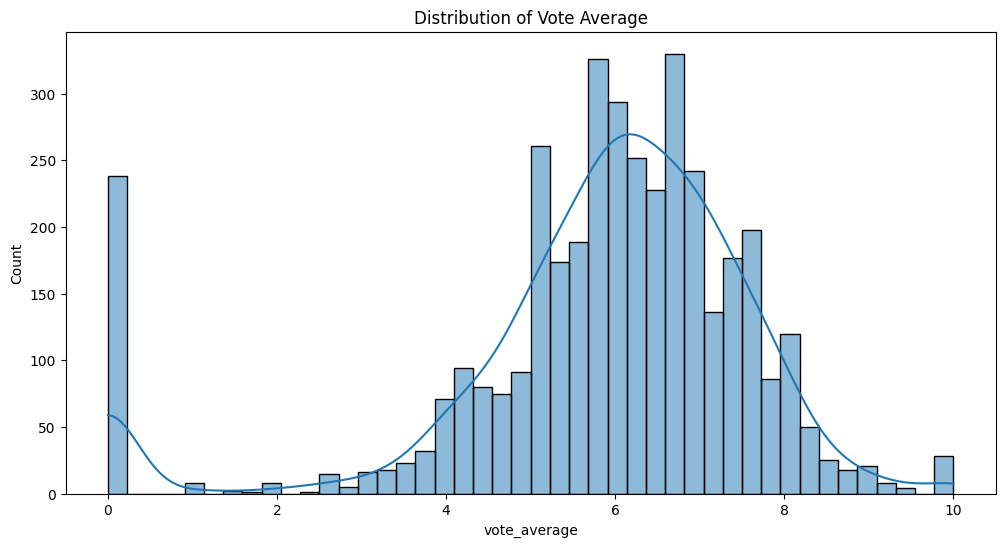

In [45]:
#plot the distribution of the vote_average column
plt.figure(figsize=(12, 6))
sns.histplot(df['vote_average'], kde=True)
plt.title('Distribution of Vote Average')
plt.show()

Now, we will encode the popularity and vote_average columns to include the column name in the encoding.



In [46]:
# add the column name to every value in the popularity and vote_average columns
df['popularity'] = df['popularity'].astype(str) + '_popularity'
df['vote_average'] = df['vote_average'].astype(str) + '_vote_average'

df.head(3)

,adult,genres,id,imdb_id,overview,popularity,poster_path,production_companies,release_date,tagline,title,vote_average,keywords
22310,False,[Comedy],194188.0,tt2836166,"Punk's Dead, the sequel to 1999 cult hit SLC P...",0.01_popularity,/1IzcjXhZHewvmLfKd8eGucDutyQ.jpg,[],2016-02-11,A young punk's odyssey.,Punk's Dead: SLC Punk 2,6.0_vote_average,[]
23456,False,"[Action, Adventure, Thriller]",177677.0,tt2381249,Ethan and team take on their most impossible m...,0.33_popularity,/z2sJd1OvAGZLxgjBdSnQoLCfn3M.jpg,"[Paramount Pictures, Skydance Productions, Chi...",2015-07-23,Desperate Times. Desperate Measures.,Mission: Impossible - Rogue Nation,7.1_vote_average,"[london england, spy, austria, villain, sequel..."
23617,False,[],295958.0,tt2990756,This soulful documentary illuminates the hell-...,0.0_popularity,/cFaNxdOzL47wb1M1hvIf0Vtd99u.jpg,[],2016-07-15,None,Sound of Redemption: The Frank Morgan Story,0.0_vote_average,[woman director]


In [47]:
# create a duplicate of the title column and name it movie_title
df['movie_title'] = df['title']

Next, we will remove the spaces in the production_companies column and convert the column to a list of strings.

In [48]:
# create a function that removes spaces from the list of strings in the columns
def remove_space(column):
    return [x.replace(" ", "") for x in column]

# apply the function to the columns
df['production_companies'] = df['production_companies'].apply(remove_space)
df['keywords'] = df['keywords'].apply(remove_space)
df['genres'] = df['genres'].apply(remove_space)

In [49]:
df.head(3)

,adult,genres,id,imdb_id,overview,popularity,poster_path,production_companies,release_date,tagline,title,vote_average,keywords,movie_title
22310,False,[Comedy],194188.0,tt2836166,"Punk's Dead, the sequel to 1999 cult hit SLC P...",0.01_popularity,/1IzcjXhZHewvmLfKd8eGucDutyQ.jpg,[],2016-02-11,A young punk's odyssey.,Punk's Dead: SLC Punk 2,6.0_vote_average,[],Punk's Dead: SLC Punk 2
23456,False,"[Action, Adventure, Thriller]",177677.0,tt2381249,Ethan and team take on their most impossible m...,0.33_popularity,/z2sJd1OvAGZLxgjBdSnQoLCfn3M.jpg,"[ParamountPictures, SkydanceProductions, China...",2015-07-23,Desperate Times. Desperate Measures.,Mission: Impossible - Rogue Nation,7.1_vote_average,"[londonengland, spy, austria, villain, sequel,...",Mission: Impossible - Rogue Nation
23617,False,[],295958.0,tt2990756,This soulful documentary illuminates the hell-...,0.0_popularity,/cFaNxdOzL47wb1M1hvIf0Vtd99u.jpg,[],2016-07-15,None,Sound of Redemption: The Frank Morgan Story,0.0_vote_average,[womandirector],Sound of Redemption: The Frank Morgan Story


In [50]:
df['production_companies'].iloc[12]

['UniversalPictures', 'ForwardPass', 'LegendaryPictures']

In [51]:
df.head(1)

,adult,genres,id,imdb_id,overview,popularity,poster_path,production_companies,release_date,tagline,title,vote_average,keywords,movie_title
22310,False,[Comedy],194188.0,tt2836166,"Punk's Dead, the sequel to 1999 cult hit SLC P...",0.01_popularity,/1IzcjXhZHewvmLfKd8eGucDutyQ.jpg,[],2016-02-11,A young punk's odyssey.,Punk's Dead: SLC Punk 2,6.0_vote_average,[],Punk's Dead: SLC Punk 2


Next, we will convert all the columns that are not a list of strings to a list of strings.

In [52]:
# list of columns to convert to list
columns_to_convert = ['title', 'tagline', 'overview', 'popularity', 'vote_average']

for column in columns_to_convert:
    df[column] = df[column].apply(lambda x: [x])

df.head(4)

,adult,genres,id,imdb_id,overview,popularity,poster_path,production_companies,release_date,tagline,title,vote_average,keywords,movie_title
22310,False,[Comedy],194188.0,tt2836166,"[Punk's Dead, the sequel to 1999 cult hit SLC ...",[0.01_popularity],/1IzcjXhZHewvmLfKd8eGucDutyQ.jpg,[],2016-02-11,[A young punk's odyssey.],[Punk's Dead: SLC Punk 2],[6.0_vote_average],[],Punk's Dead: SLC Punk 2
23456,False,"[Action, Adventure, Thriller]",177677.0,tt2381249,[Ethan and team take on their most impossible ...,[0.33_popularity],/z2sJd1OvAGZLxgjBdSnQoLCfn3M.jpg,"[ParamountPictures, SkydanceProductions, China...",2015-07-23,[Desperate Times. Desperate Measures.],[Mission: Impossible - Rogue Nation],[7.1_vote_average],"[londonengland, spy, austria, villain, sequel,...",Mission: Impossible - Rogue Nation
23617,False,[],295958.0,tt2990756,[This soulful documentary illuminates the hell...,[0.0_popularity],/cFaNxdOzL47wb1M1hvIf0Vtd99u.jpg,[],2016-07-15,[None],[Sound of Redemption: The Frank Morgan Story],[0.0_vote_average],[womandirector],Sound of Redemption: The Frank Morgan Story
23879,False,"[ScienceFiction, Fantasy, Action, Adventure]",76757.0,tt1617661,[In a universe where human genetic material is...,[0.39_popularity],/aMEsvTUklw0uZ3gk3Q6lAj6302a.jpg,"[VillageRoadshowPictures, DuneEntertainment, A...",2015-02-04,[Expand your universe.],[Jupiter Ascending],[5.2_vote_average],"[jupiter, space, womandirector, 3d, interspeci...",Jupiter Ascending


In [53]:
df.head(1)

,adult,genres,id,imdb_id,overview,popularity,poster_path,production_companies,release_date,tagline,title,vote_average,keywords,movie_title
22310,False,[Comedy],194188.0,tt2836166,"[Punk's Dead, the sequel to 1999 cult hit SLC ...",[0.01_popularity],/1IzcjXhZHewvmLfKd8eGucDutyQ.jpg,[],2016-02-11,[A young punk's odyssey.],[Punk's Dead: SLC Punk 2],[6.0_vote_average],[],Punk's Dead: SLC Punk 2


The next step is to reduce the words in some of the columns to their root form. We will use the nltk library to achieve this.

In [54]:
# stem the words in the tag column
import nltk
from nltk.stem import PorterStemmer
ps = PorterStemmer()

In [55]:
# create a function to stem words
def stem_words(text):
# Convert list to string
    if isinstance(text, list):  
        text = ' '.join(text)  

    # Stem words  
    t = [ps.stem(word) for word in text.split()]  
    
    return ' '.join(t)  

In [56]:
# list of column to stem
columns_to_stem = ['title', 'tagline', 'overview', 'keywords', 'genres', 'production_companies', 'popularity', 'vote_average']


# apply the function to the columns
for column in columns_to_stem:
    df[column] = df[column].apply(stem_words)

df.head(3)

,adult,genres,id,imdb_id,overview,popularity,poster_path,production_companies,release_date,tagline,title,vote_average,keywords,movie_title
22310,False,comedi,194188.0,tt2836166,"punk' dead, the sequel to 1999 cult hit slc pu...",0.01_popular,/1IzcjXhZHewvmLfKd8eGucDutyQ.jpg,,2016-02-11,a young punk' odyssey.,punk' dead: slc punk 2,6.0_vote_averag,,Punk's Dead: SLC Punk 2
23456,False,action adventur thriller,177677.0,tt2381249,ethan and team take on their most imposs missi...,0.33_popular,/z2sJd1OvAGZLxgjBdSnQoLCfn3M.jpg,paramountpictur skydanceproduct chinamoviechan...,2015-07-23,desper times. desper measures.,mission: imposs - rogu nation,7.1_vote_averag,londonengland spi austria villain sequel missi...,Mission: Impossible - Rogue Nation
23617,False,,295958.0,tt2990756,thi soul documentari illumin the hell-and- bac...,0.0_popular,/cFaNxdOzL47wb1M1hvIf0Vtd99u.jpg,,2016-07-15,none,sound of redemption: the frank morgan stori,0.0_vote_averag,womandirector,Sound of Redemption: The Frank Morgan Story


Now, we will combine all the movies attribes into a column called 'tag'. This will help us to easily compute the similarity between movies.

In [57]:
# Create a tag column that combines all the columns in the dataset
df['tag'] = df['title'] +   ', ' + df['genres'] + ',' + df['overview'] + ', '+ df['tagline'] + ', ' + df['keywords']   

df.head(2)

,adult,genres,id,imdb_id,overview,popularity,poster_path,production_companies,release_date,tagline,title,vote_average,keywords,movie_title,tag
22310,False,comedi,194188.0,tt2836166,"punk' dead, the sequel to 1999 cult hit slc pu...",0.01_popular,/1IzcjXhZHewvmLfKd8eGucDutyQ.jpg,,2016-02-11,a young punk' odyssey.,punk' dead: slc punk 2,6.0_vote_averag,,Punk's Dead: SLC Punk 2,"punk' dead: slc punk 2, comedi,punk' dead, the..."
23456,False,action adventur thriller,177677.0,tt2381249,ethan and team take on their most imposs missi...,0.33_popular,/z2sJd1OvAGZLxgjBdSnQoLCfn3M.jpg,paramountpictur skydanceproduct chinamoviechan...,2015-07-23,desper times. desper measures.,mission: imposs - rogu nation,7.1_vote_averag,londonengland spi austria villain sequel missi...,Mission: Impossible - Rogue Nation,"mission: imposs - rogu nation, action adventur..."


In [58]:
# drop the columns used to create the tag column
#columns_to_drop = ['tagline', 'overview', 'popularity', 'vote_average', 'is_adult']
columns_to_drop = ['tagline', 'overview', 'popularity', 'vote_average', 'release_date']

df.drop(columns_to_drop, axis=1, inplace=True)
df.drop(['genres', 'keywords', 'production_companies'], axis=1, inplace=True)
df.head(3)

,adult,id,imdb_id,poster_path,title,movie_title,tag
22310,False,194188.0,tt2836166,/1IzcjXhZHewvmLfKd8eGucDutyQ.jpg,punk' dead: slc punk 2,Punk's Dead: SLC Punk 2,"punk' dead: slc punk 2, comedi,punk' dead, the..."
23456,False,177677.0,tt2381249,/z2sJd1OvAGZLxgjBdSnQoLCfn3M.jpg,mission: imposs - rogu nation,Mission: Impossible - Rogue Nation,"mission: imposs - rogu nation, action adventur..."
23617,False,295958.0,tt2990756,/cFaNxdOzL47wb1M1hvIf0Vtd99u.jpg,sound of redemption: the frank morgan stori,Sound of Redemption: The Frank Morgan Story,"sound of redemption: the frank morgan stori, ,..."


In [59]:
df['tag'].iloc[2]

'sound of redemption: the frank morgan stori, ,thi soul documentari illumin the hell-and- back life of the late, great l.a. alto sax legend frank morgan. a prodigi who wa acclaim as the natur heir to hi bebop mentor, charli parker, morgan derail hi career with heroin, which led him into a life of crime. after decad in prison, he made an astonish comeback, leav behind record of deep, melancholi beauty. frame by a tribut concert held in san quentin, where morgan’ 19-year-old asian-american protégé, grace kelly, perform a heart-stop version of “over the rainbow,” n.c. heikin’ film is fill with reveal interview with the colleagues, lovers, famili and wive who accompani morgan on hi long and rocki journey to redemption., none, womandirector'

In [60]:
df['tag'].iloc[2]

'sound of redemption: the frank morgan stori, ,thi soul documentari illumin the hell-and- back life of the late, great l.a. alto sax legend frank morgan. a prodigi who wa acclaim as the natur heir to hi bebop mentor, charli parker, morgan derail hi career with heroin, which led him into a life of crime. after decad in prison, he made an astonish comeback, leav behind record of deep, melancholi beauty. frame by a tribut concert held in san quentin, where morgan’ 19-year-old asian-american protégé, grace kelly, perform a heart-stop version of “over the rainbow,” n.c. heikin’ film is fill with reveal interview with the colleagues, lovers, famili and wive who accompani morgan on hi long and rocki journey to redemption., none, womandirector'

Saving the cleaned dataset

In [79]:
# save the cleaned dataset
df.to_csv('cleaned_movies3.csv', index=False)

### Feature Extraction

The next step is to create a content-based recommendation system using the cleaned dataset. We will use the CountVectorizer to convert the tag column into a matrix of token counts. We will then use the cosine_similarity to calculate the cosine similarity between the movies.  

In [61]:
# load the cleaned dataset
df = pd.read_csv('cleaned_movies3.csv')
df.head()

,id,imdb_id,poster_path,title,movie_title,tag
0,194188,tt2836166,/1IzcjXhZHewvmLfKd8eGucDutyQ.jpg,punk' dead: slc punk 2,Punk's Dead: SLC Punk 2,"punk' dead: slc punk 2, comedi,punk' dead, the..."
1,177677,tt2381249,/z2sJd1OvAGZLxgjBdSnQoLCfn3M.jpg,mission: imposs - rogu nation,Mission: Impossible - Rogue Nation,"mission: imposs - rogu nation, action adventur..."
2,295958,tt2990756,/cFaNxdOzL47wb1M1hvIf0Vtd99u.jpg,sound of redemption: the frank morgan stori,Sound of Redemption: The Frank Morgan Story,"sound of redemption: the frank morgan stori, ,..."
3,76757,tt1617661,/aMEsvTUklw0uZ3gk3Q6lAj6302a.jpg,jupit ascend,Jupiter Ascending,"jupit ascend, sciencefict fantasi action adven..."
4,264660,tt0470752,/btbRB7BrD887j5NrvjxceRDmaot.jpg,ex machina,Ex Machina,"ex machina, drama sciencefict,caleb, a 26 year..."


In [62]:
df.shape

(3945, 6)

In [63]:
# import CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000, stop_words='english')


In [64]:
vectorized = cv.fit_transform(df['tag']).toarray()
vectorized

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [65]:
# check the shape of the vectorized array
vectorized.shape

(3945, 5000)

Now we will use the cosine similarity to find the similarity between the movies

In [66]:
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors

# Convert to sparse matrix
vectorized_sparse = csr_matrix(vectorized)

# Use sparse matrix in NearestNeighbors
nn = NearestNeighbors(metric="cosine", algorithm="brute")
nn.fit(vectorized_sparse)

NearestNeighbors(algorithm='brute', metric='cosine')

Note: I ran into a memory error while trying to compute the cosine similarity on the full dataset. Therefore, I  converted the vectorized data into a sparse matrix before using NearestNeighbors

Now we will create a function that takes in a movie title and returns the top 10 similar movies.

In [67]:
# Function to get movie recommendations
def get_recommendations(query_index, df, vectorized_sparse, n_neighbors=10):
    distances, indices = nn.kneighbors(vectorized_sparse[query_index], n_neighbors=n_neighbors)
    
    # Exclude the movie itself
    recommended_indices = indices[0][1:]  

    # Get recommended rows
    recommended_movies = df.iloc[recommended_indices]  

    # movie in consideration
    query_movie = df.iloc[query_index]

    print(f"Recommendations for: **{query_movie['movie_title']}**\n")
    
    return recommended_movies[[ 'movie_title','id', 'poster_path', 'tag']]

In [68]:
# Get recommendations for the first movie
recommendations = get_recommendations(1, df, vectorized_sparse)
recommendations

Recommendations for: **Mission: Impossible - Rogue Nation**



,movie_title,id,poster_path,tag
3716,Extraordinary Mission,445224,/yvNOI8x3K6ZTNJVjvTkPq4KyrW1.jpg,"extraordinari mission, action crime thriller,‘..."
1866,Code of Honor,389425,/oBAEIEMjldg7LQzV0c35nv74HNY.jpg,"code of honor, action crime thriller,colonel r..."
3134,Gantz:O,396263,/fF33nRbgvxNgTTPUuNqNsRPYmxZ.jpg,"gantz:o, action anim horror sciencefict,somewh..."
1676,Mission to Lars,109581,/ceE9P7bChNMMrSAsuhsIYfwAjkn.jpg,"mission to lar, documentari,kate and will spic..."
3489,Rising Fear,442949,/nJnHhlefCB6QH9CQJz7CvTJp9eB.jpg,"rise fear, action,when terrorist take our nati..."
308,Criminal,302156,/6K5JOW6HmrwJnP0VILq667cspnS.jpg,"crimin, action,bill pope is a cia agent on a m..."
3694,Tiger Raid,390587,/gXfdb6TCInS6Tu3HMHQleZUaaLm.jpg,"tiger raid, thriller,while on a covert mission..."
1095,Diablo,362703,/qHxDheAS78Uvn9GQUkS6erZhWs2.jpg,"diablo, action adventur thriller western,a you..."
2893,ISRA 88,401222,/fpqjKTN516VfchjH5HzWiMuGnHC.jpg,"isra 88, thriller adventur sciencefict mysteri..."


In [69]:
# Get recommendations for the first movie
recommendations = get_recommendations(70, df, vectorized_sparse)
recommendations

Recommendations for: **People, Places, Things**



,movie_title,id,poster_path,tag
3205,The Apostate,351097,/9zqA0Yu5t2q1raQDS938SWNtjuq.jpg,"the apost, comedi drama,a young man navig the ..."
2692,Why Him?,356305,/eezFoKz7bXgdbjeieeCYJFXPKSu.jpg,"whi him?, comedi,a dad form a bitter rivalri w..."
2194,"Kiki, Love to Love",370978,/cECmCM3MMRiaLNDdYBLeGU7PRAk.jpg,"kiki, love to love, comedi romanc,through five..."
758,The Student and Mister Henri,360638,/vcwKqfw1bQeDz4tS96ca1mHZqLV.jpg,"the student and mister henri, drama comedi,bec..."
2947,Better Off Single,333358,/w5PW9P5ZoGo7C0yX8MSBOwRPFVo.jpg,"better off singl, comedi,a comedi that follow ..."
3455,Tramps,412209,/baXRDIafCF0qVkpySLpQp8bQMEv.jpg,"tramp, comedi romanc,a young man and woman fin..."
886,The Surprise,277153,/7wqItXEXUqkeFTs4whTj4vLvU80.jpg,"the surpris, comedi romanc,an eccentr multimil..."
3414,False Confessions,413648,/kB8QdC8HG4zxoj8BLiuBsb6twhM.jpg,"fals confess, drama comedi,dorante, an impover..."
3733,Goon: Last of the Enforcers,336890,/emio9KDrLXqqX4wXa4YTacBQXG.jpg,"goon: last of the enforc, comedi,dure a pro lo..."


In [70]:
# Get recommendations for the first movie
recommendations = get_recommendations(1078, df, vectorized_sparse)
recommendations

Recommendations for: **The Devil's Candy**



,movie_title,id,poster_path,tag
3764,Family Possessions,422472,/a9mJM5kZoZXMv2KbZce9aJopxYh.jpg,"famili possess, horror,after move into the hom..."
2150,Demon,356191,/mAIRNNPzBBONMntjzTE9TsvOAGu.jpg,"demon, drama horror thriller,a bridegroom is p..."
315,The Disappointments Room,293452,/htnXSuO0gMawdCfOZwFEs8kMCl8.jpg,"the disappoint room, drama thriller horror,a m..."
3240,The Bride,422715,/wNZndH4YxYMQFBR9fAd90rGWciH.jpg,"the bride, mysteri horror thriller,thi is a st..."
1448,Catastasis,352166,/9eTdAsKh8dzHslm7CLDTtF2vtgi.jpg,"catastasi, thriller horror,a mysteri man hold ..."
1725,Point Zero,361146,/z2wqkEqx1vteegsWGFGjFpveauY.jpg,"point zero, thriller drama,young ênio is have ..."
3441,Lowriders,333384,/mafycJVTwbsArAycD9yv1KzeAxH.jpg,"lowrid, drama,a young street artist in east lo..."
2242,The Automatic Hate,324174,/zOzNHAQYeIX4LbFqG7C6l4irqln.jpg,"the automat hate, drama comedi,when davi green..."
3601,Roommates Wanted,384371,/sqcp1tzedvMgG9ynyXSfRTucFK9.jpg,"roommat want, comedi,when recent widowed, it i..."


In [71]:
# Get recommendations for the first movie
recommendations = get_recommendations(216, df, vectorized_sparse)
recommendations

Recommendations for: **Hitman: Agent 47**



,movie_title,id,poster_path,tag
3582,The Hunter's Prayer,302150,/2qVnSDniGtf2mL941v2izSIzpon.jpg,"the hunter' prayer, action thriller,an assassi..."
2016,Assassin X,407455,/80UF6GhWkx9Bd4VQPSiuDzaOK97.jpg,"assassin x, action,the chemist is a gritti act..."
3235,The Assignment,399173,/1BGHC3MwmzYQCr8kBnxCVjtkuNm.jpg,"the assign, action crime thriller,ace assassin..."
2616,Eliminators,421313,/aSTaOV79Xn3Qyb8vNtmxl7CCq9J.jpg,"elimin, action,a former us feder agent must ab..."
609,The Assassin,253450,/o95K5iPwIqH8oPSFBoGEQkTtZb0.jpg,"the assassin, action drama histori,a femal ass..."
537,Assassination,291549,/1pGzy9MhrxOCyuF8Ae8yVUcLvlr.jpg,"assassin, action drama histori thriller,assass..."
1378,Mr. Right,333385,/y1VT2NoBOx3aC2exhkyN9AGUkMR.jpg,"mr. right, action comedi romanc,a girl fall fo..."
147,The Gunman,266396,/k7WX4UTkiWqef3pM20iuj122mL7.jpg,"the gunman, action drama crime,eight year afte..."
32,Everly,277355,/dU7fJCSeZCjnoqb57HUQCZwwAhA.jpg,"everli, thriller action,after she betray a pow..."


In [72]:
# Get recommendations for the first movie
recommendations = get_recommendations(1722, df, vectorized_sparse)
recommendations

Recommendations for: **Zoombies**



,movie_title,id,poster_path,tag
3412,Resident Evil: Vendetta,400136,/88qfHWhlOBYXp69277QFhdPYnWf.jpg,"resid evil: vendetta, action adventur anim hor..."
3681,Breakdown Lane,401359,/nevwDR8ODeY7nqdZlEo0gqGH6ZA.jpg,"breakdown lane, drama horror thriller,when kir..."
749,The Hive,291866,/vqqxJd3tjcf0HRoHMeSGpYa9h53.jpg,"the hive, horror sciencefict thriller,an amnes..."
470,Extinction,338676,/xEoleA3nm71cE7wiu4IXfk7yH8K.jpg,"extinct, drama horror sciencefict,and suddenly..."
756,Re-Kill,106845,/y4FN6LVPzUbNRQIxOhPe9oCCKFW.jpg,"re-kil, horror sciencefict,five year after a z..."
7,Jurassic World,135397,/jjBgi2r5cRt36xF6iNUEhzscEcb.jpg,"jurass world, action adventur sciencefict thri..."
1412,What We Become,356326,/pj26VlBCI0vMZcrbEkC7Zs8GRSj.jpg,"what we becom, horror thriller,a famili of fou..."
671,Navy Seals vs. Zombies,361159,/u9MaqPMe7ARQhDQWZQaqmsnuNX9.jpg,"navi seal vs. zombi, horror action,a team of h..."
1798,Dead Rising: Endgame,400605,/7pQL75g5mmQxeOg3atTEw6OhvTo.jpg,"dead rising: endgam, action horror,investig re..."


In [73]:
# Get recommendations for the first movie
recommendations = get_recommendations(1855, df, vectorized_sparse)
recommendations

Recommendations for: **Life, Animated**



,movie_title,id,poster_path,tag
3026,Floyd Norman: An Animated Life,407588,/oGrsCgqJa9oq667FgPKinwr8IfN.jpg,"floyd norman: an anim life, documentari,animat..."
2736,A Grand Night In: The Story of Aardman,374460,/suauS4krivBfOc0FdP5PYpbAei9.jpg,"a grand night in: the stori of aardman, anim d..."
2705,A Year and Change,340194,/71FlpzluhwOWxFRVZlLvaSDUtBD.jpg,"a year and chang, comedi drama,after fall off ..."
2135,Birdboy: The Forgotten Children,361705,/9UqIT5KX2zjCJldYaO3ok3FHL7j.jpg,"birdboy: the forgotten children, anim,birdboy ..."
819,Extraordinary Tales,329020,/9acjcYCC5vRbzIwlhKZJBVNjMg9.jpg,"extraordinari tale, horror anim mysteri,an ani..."
1312,Last Day of Freedom,369366,/pyoCj6HLZnQSQP3egUKZpgYL6d.jpg,"last day of freedom, anim crime documentari,wh..."
3233,Joe's Violin,393949,/eTkznzOCstYXM0OifpziWtLwjU3.jpg,"joe' violin, documentari,a 91-year-old polish ..."
297,The Secret Life of Pets,328111,/WLQN5aiQG8wc9SeKwixW7pAR8K.jpg,"the secret life of pet, anim famili,the quiet ..."
3941,"Blood, Sweat and Tears",327237,/aNrh6DfTngUvi7WdpTjLTPzYbTU.jpg,"blood, sweat and tear, drama,bloed, zweet en t..."


In [16]:
# save df as a pickle file
import pickle

pickle.dump(df, open('movie_list.pkl', 'wb'))




In [11]:
# save the vectorized_sparse as a pickle file
pickle.dump(vectorized_sparse, open('vectorized_sparse.pkl', 'wb'))
